In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

# New York Biking Dataset Analysis

Attributes

The attributes are defines as follows:

Date: date

Day: day of the week (we’ve transformed these values)

High Temp (°F): highest temperature during the specific day

Low Temp (°F): lowest temperature during the specific day

Precipitation: precipitation during the specific day (transformed from object into integer ?) = Precipitation_num

Brooklyn Bridge: number of biker sightings counted (allows for repeated observations of the same individual?)

Manhattan Bridge: number of biker sightings counted (allows for repeated observations of the same individual?)

Williamsburg Bridge: number of biker sightings counted (allows for repeated observations of the same individual?)

Queensboro Bridge: number of biker sightings counted (allows for repeated observations of the same individual?)

Total: total number of biker sightings counted on all 4 bridges (allows for repeated observations of the same individual?)

In [170]:
df = pd.read_csv('bikes.csv',sep=';', encoding = "ISO-8859-1")
df

,Date,High Temp (Ã¸F),Low Temp (Ã¸F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,01.04.2017,46,37,0,606,1446,1915,1430,5397
1,02.04.2017,"62,1",41,0,2021,3943,4207,2862,13033
2,03.04.2017,63,50,"0,03",2470,4988,5178,3689,16325
3,04.04.2017,"51,1",46,"1,18",723,1913,2279,1666,6581
4,05.04.2017,63,46,0,2807,5276,5711,4197,17991
...,...,...,...,...,...,...,...,...,...
209,27.10.2017,"62,1",48,0,3150,5610,6450,5181,20391
210,28.10.2017,68,"55,9",0,2245,4520,5104,4069,15938
211,29.10.2017,"64,9",61,"3,03",183,661,1026,965,2835
212,30.10.2017,55,46,"0,25",1428,2966,3547,2924,10865


In [171]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d.%m.%Y')

df['DayOfWeek']=df['Date'].dt.day_name()

In [172]:
df['High Temp (Ã¸F)'] = df['High Temp (Ã¸F)'].apply(lambda x: x.replace(',','.')).astype(float)
df['Low Temp (Ã¸F)'] = df['Low Temp (Ã¸F)'].apply(lambda x: x.replace(',','.')).astype(float)

df

,Date,High Temp (Ã¸F),Low Temp (Ã¸F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,DayOfWeek
0,2017-04-01,46.0,37.0,0,606,1446,1915,1430,5397,Saturday
1,2017-04-02,62.1,41.0,0,2021,3943,4207,2862,13033,Sunday
2,2017-04-03,63.0,50.0,"0,03",2470,4988,5178,3689,16325,Monday
3,2017-04-04,51.1,46.0,"1,18",723,1913,2279,1666,6581,Tuesday
4,2017-04-05,63.0,46.0,0,2807,5276,5711,4197,17991,Wednesday
...,...,...,...,...,...,...,...,...,...,...
209,2017-10-27,62.1,48.0,0,3150,5610,6450,5181,20391,Friday
210,2017-10-28,68.0,55.9,0,2245,4520,5104,4069,15938,Saturday
211,2017-10-29,64.9,61.0,"3,03",183,661,1026,965,2835,Sunday
212,2017-10-30,55.0,46.0,"0,25",1428,2966,3547,2924,10865,Monday


In [173]:
df['Precipitation'].replace('T', '0,00', inplace=True)

In [174]:
df['Precipitation'] = df['Precipitation'].apply(lambda x: x.replace(',','.')).astype(float)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 214 non-null    datetime64[ns]
 1   High Temp (Ã¸F)      214 non-null    float64       
 2   Low Temp (Ã¸F)       214 non-null    float64       
 3   Precipitation        214 non-null    float64       
 4   Brooklyn Bridge      214 non-null    int64         
 5   Manhattan Bridge     214 non-null    int64         
 6   Williamsburg Bridge  214 non-null    int64         
 7   Queensboro Bridge    214 non-null    int64         
 8   Total                214 non-null    int64         
 9   DayOfWeek            214 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 16.8+ KB


In [176]:
df

,Date,High Temp (Ã¸F),Low Temp (Ã¸F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,DayOfWeek
0,2017-04-01,46.0,37.0,0.00,606,1446,1915,1430,5397,Saturday
1,2017-04-02,62.1,41.0,0.00,2021,3943,4207,2862,13033,Sunday
2,2017-04-03,63.0,50.0,0.03,2470,4988,5178,3689,16325,Monday
3,2017-04-04,51.1,46.0,1.18,723,1913,2279,1666,6581,Tuesday
4,2017-04-05,63.0,46.0,0.00,2807,5276,5711,4197,17991,Wednesday
...,...,...,...,...,...,...,...,...,...,...
209,2017-10-27,62.1,48.0,0.00,3150,5610,6450,5181,20391,Friday
210,2017-10-28,68.0,55.9,0.00,2245,4520,5104,4069,15938,Saturday
211,2017-10-29,64.9,61.0,3.03,183,661,1026,965,2835,Sunday
212,2017-10-30,55.0,46.0,0.25,1428,2966,3547,2924,10865,Monday


In [177]:
df.describe()

,High Temp (Ã¸F),Low Temp (Ã¸F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.201869,62.027103,0.131776,2680.042056,5345.485981,6051.658879,4550.490654,18627.677570
std,10.390443,9.305792,0.394216,854.710864,1746.546523,1755.814991,1306.899746,5539.557489
min,46.000000,37.000000,0.000000,151.000000,484.000000,874.000000,865.000000,2374.000000
25%,66.900000,55.225000,0.000000,2298.000000,4308.000000,5115.000000,3746.000000,15704.750000
50%,75.900000,64.000000,0.000000,2857.000000,5607.500000,6287.000000,4681.000000,19367.000000
75%,82.000000,70.000000,0.037500,3285.000000,6759.500000,7512.500000,5692.000000,23151.500000
max,93.900000,78.100000,3.030000,4960.000000,8239.000000,8873.000000,6582.000000,26969.000000


In [178]:
df.columns

Index(['Date', 'High Temp (Ã¸F)', 'Low Temp (Ã¸F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total', 'DayOfWeek'],
      dtype='object')

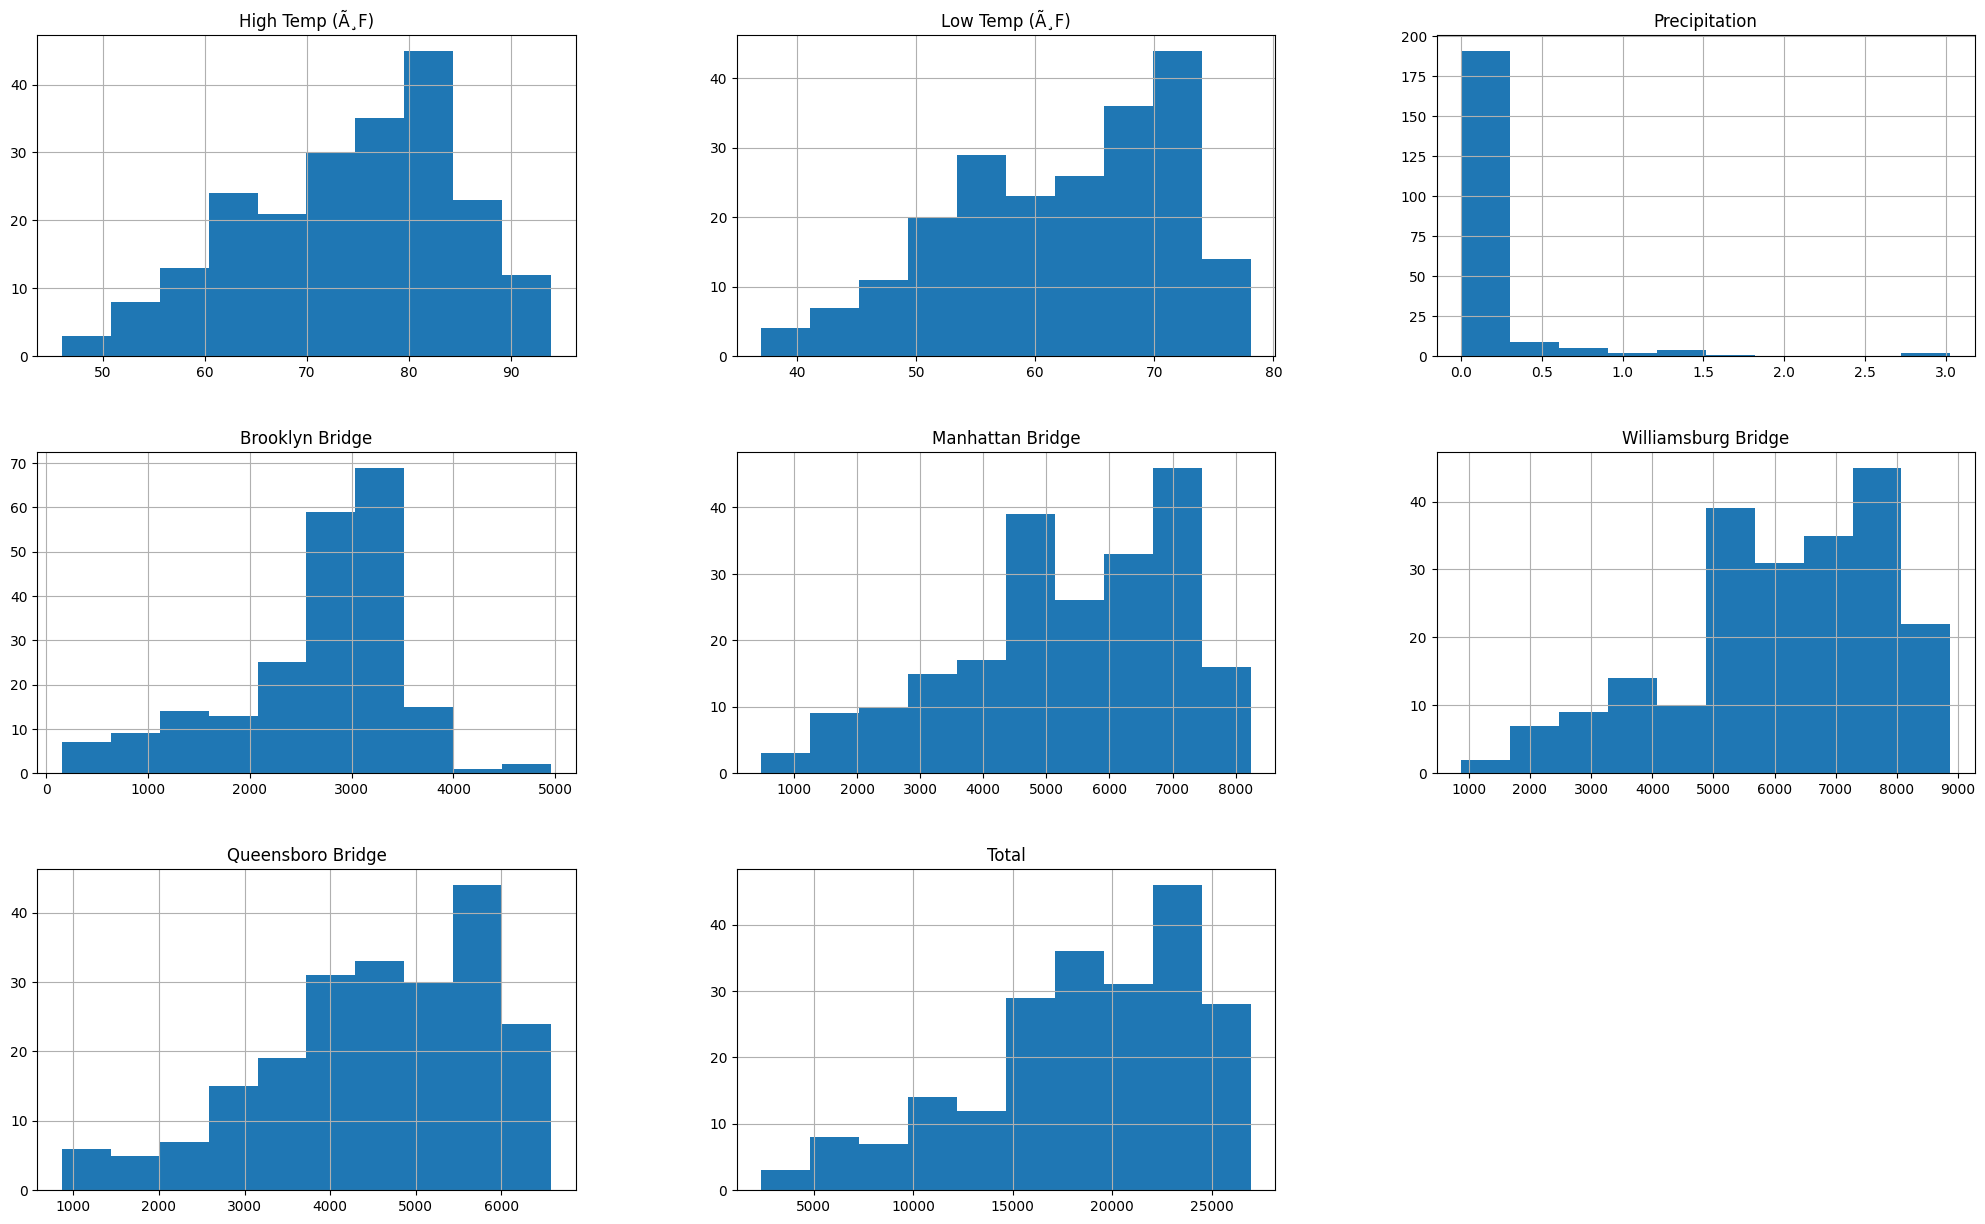

In [179]:
df[['High Temp (Ã¸F)', 'Low Temp (Ã¸F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total']].hist(bins = 10, figsize= (25, 15))
plt.show()

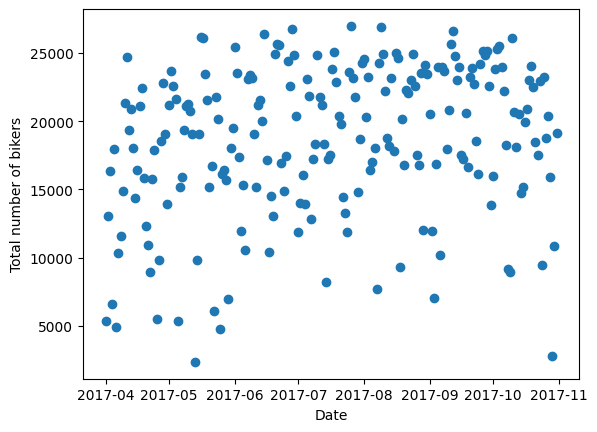

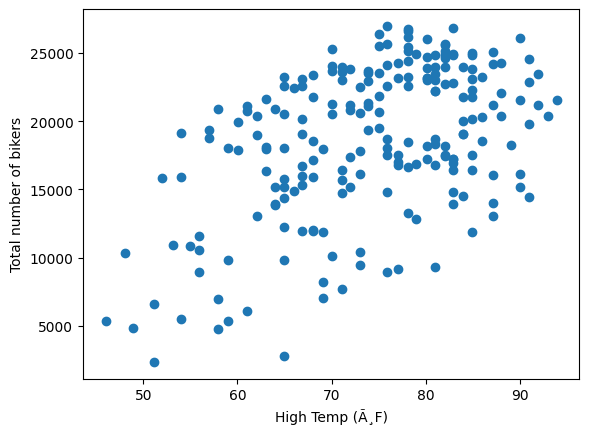

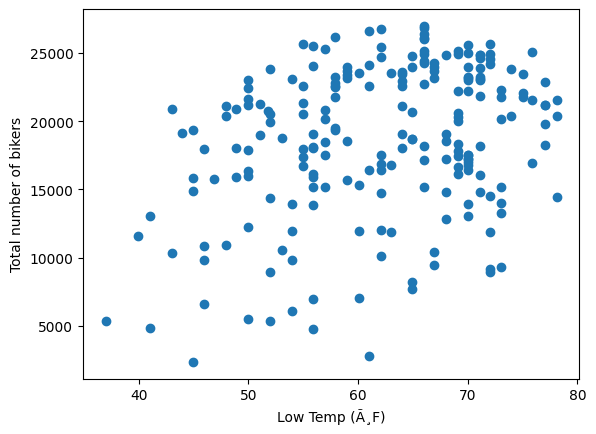

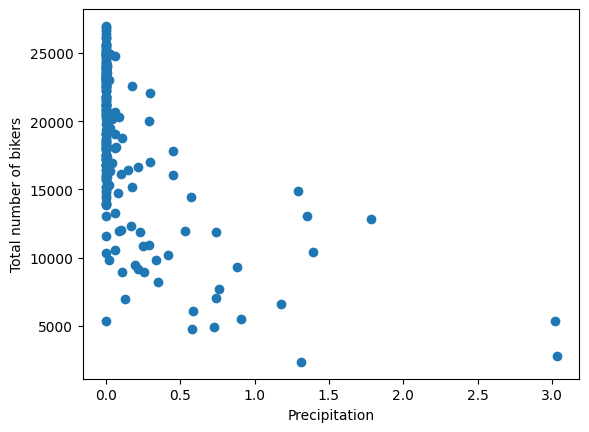

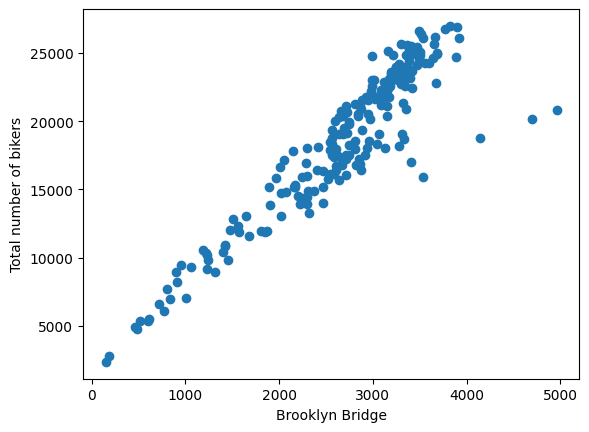

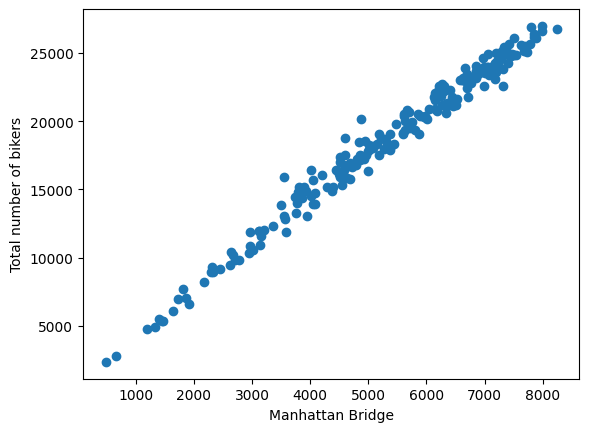

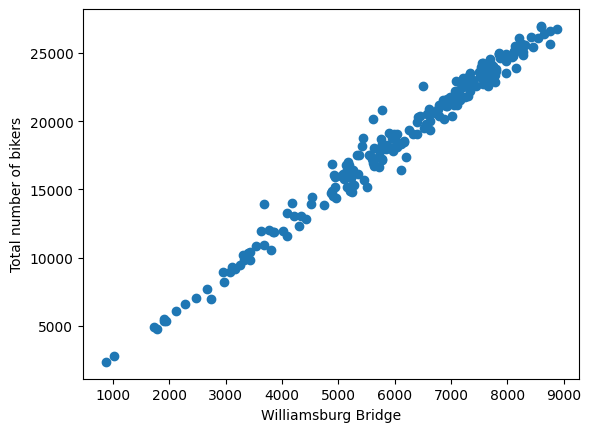

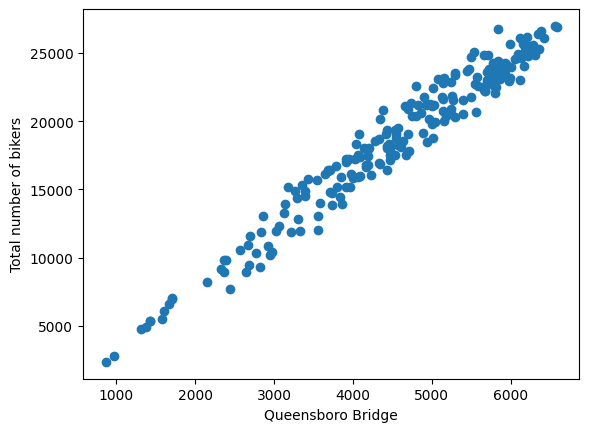

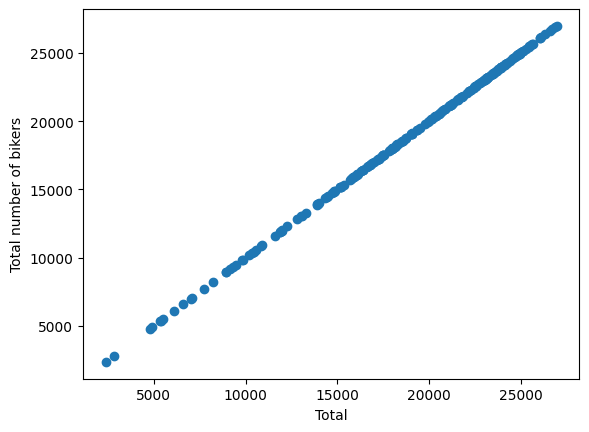

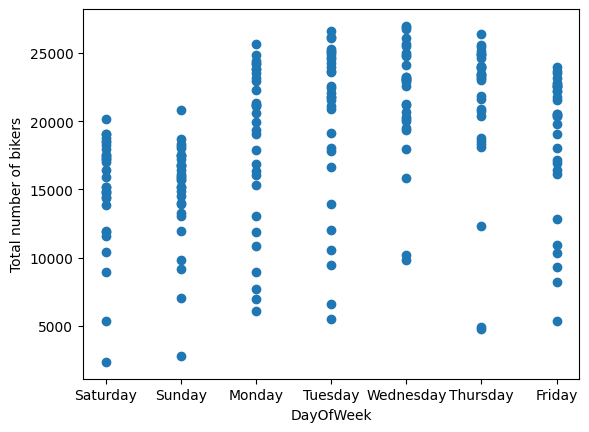

In [180]:
for i, col in enumerate(df.columns):
    plt.scatter(df[col], df['Total'])
    plt.xlabel(str(col))
    plt.ylabel('Total number of bikers')
    plt.show() 

<AxesSubplot:>

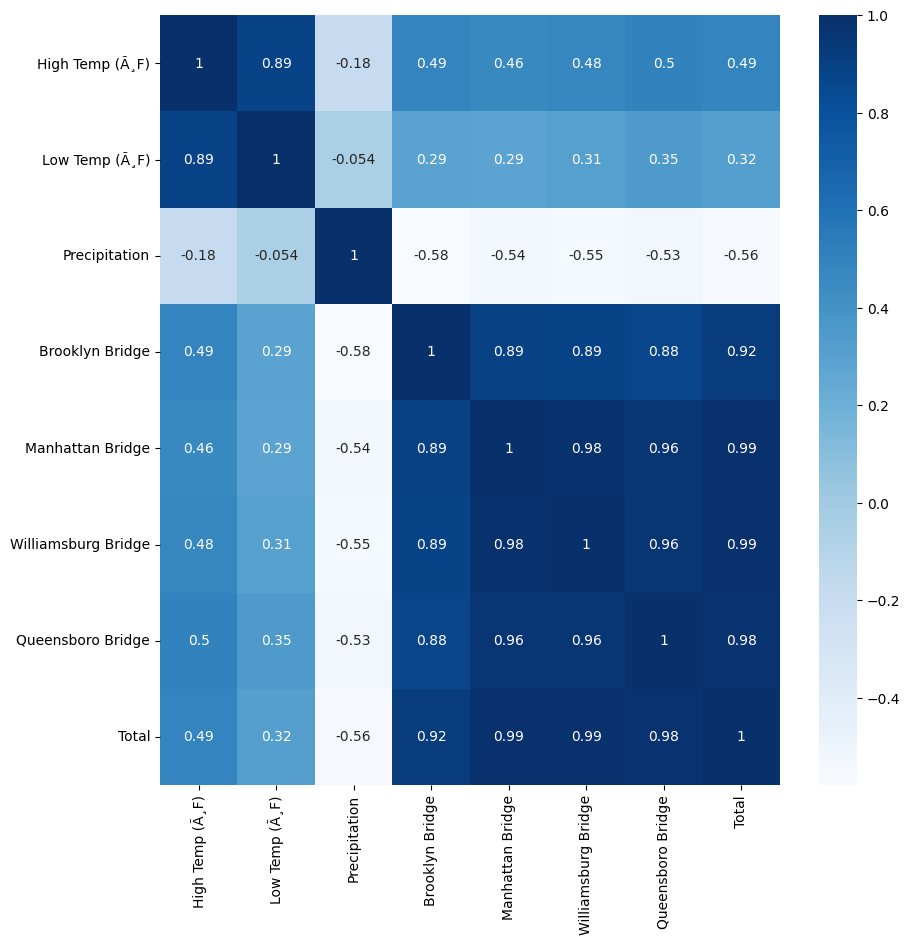

In [181]:
fig, ax = plt.subplots(figsize =(10,10))
corr = df.corr()
sns.heatmap(corr, cmap='Blues', annot = True, ax = ax)

In [182]:
df.columns

Index(['Date', 'High Temp (Ã¸F)', 'Low Temp (Ã¸F)', 'Precipitation',
       'Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge',
       'Queensboro Bridge', 'Total', 'DayOfWeek'],
      dtype='object')

In [209]:
# Regression with High temp and Precipitation for totals
x_h = df[['High Temp (Ã¸F)', 'Precipitation']]
y_h = df['Total']

# Regresiion with Low temp and Precipitation for totals
x_l = df[['Low Temp (Ã¸F)', 'Precipitation']]
y_l = df['Total']


In [210]:
x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(x_h, y_h, test_size = 0.2, random_state = 42)
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(x_l, y_l, test_size = 0.2, random_state = 42)

In [211]:
x_train_h.shape, x_test_h.shape, y_train_h.shape, y_test_h.shape

((171, 2), (43, 2), (171,), (43,))

In [212]:
x_train_l.shape, x_test_l.shape, y_train_l.shape, y_test_l.shape

((171, 2), (43, 2), (171,), (43,))

In [215]:
# fit the model on train dataset for High temperature


reg_high = LinearRegression()
reg_high.fit(x_train_h, y_train_h)

LinearRegression()

In [216]:
# fit the model on train dataset for Low temperature
reg_low = LinearRegression()
reg_low.fit(x_train_l, y_train_l)

LinearRegression()

In [217]:
# make predictions on train and test with High temp
y_pred_train_high = reg_high.predict(x_train_h)
y_pred_test_high = reg_high.predict(x_test_h)

In [219]:
# make predictions on train and test for Low temp
y_pred_train_low = reg_low.predict(x_train_l)
y_pred_test_low = reg_low.predict(x_test_l)

In [220]:
reg_high.intercept_, reg_low.intercept_

(3837.365917434632, 7947.7907012984015)

In [221]:
reg_high.coef_, reg_low.coef_

(array([  213.63333228, -7681.5785561 ]),
 array([  190.69149538, -8602.38736834]))

In [203]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [222]:
# calculate model performance metrics FOR REG_HIGH
r2_score(y_train_h, y_pred_train_high), r2_score(y_test_h, y_pred_test_high)

(0.48366844797859054, 0.39509572894654554)

In [223]:
# calculate model performance metrics FOR REG_LOW
r2_score(y_train_l, y_pred_train_low), r2_score(y_test_l, y_pred_test_low)

(0.4272111847531742, 0.2373206374614506)

In [224]:
# Metrics for Train data with High temp
mean_absolute_error(y_train_h, y_pred_train_high), mean_absolute_percentage_error(y_train_h, y_pred_train_high), mean_squared_error(y_train_h, y_pred_train_high),mean_squared_error(y_train_h, y_pred_train_high, squared= False)

(3388.0583167730515,
 0.23642118200316017,
 15768263.619931143,
 3970.9272997539433)

In [225]:
# Metrics with Train data with Low temp
mean_absolute_error(y_train_l, y_pred_train_low), mean_absolute_percentage_error(y_train_l, y_pred_train_low), mean_squared_error(y_train_l, y_pred_train_low),mean_squared_error(y_train_l, y_pred_train_low, squared= False)

(3495.233937139913, 0.25151028814634624, 17492413.55094542, 4182.393280281688)